# Credit Risk Analysis – Exploratory Data Analysis (EDA)

## Context
This project simulates a real-world credit risk analysis in a fintech environment.
The goal of this notebook is to explore customer data and identify patterns
related to default behavior to support business decisions.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")


In [22]:
df = pd.read_csv("C:/Users/Eliane/Downloads/Arquivos Facul/credit-risk-analysis/data/raw/credit_data.csv",
    sep=";",
    header=1
)

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [23]:
df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
df.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## 2. Entendimento das Variáveis

Este dataset contém informações demográficas, financeiras e comportamentais de clientes de cartão de crédito.
O objetivo da análise é compreender os fatores que influenciam a inadimplência dos clientes.

### Variável Alvo (Target)

- **default payment next month**
  - `0` → Cliente não inadimplente
  - `1` → Cliente inadimplente

Esta variável será utilizada como base para todas as análises exploratórias, indicadores e visualizações ao longo do projeto.


In [10]:
df['default payment next month'].value_counts(normalize=True) * 100


default payment next month
0    77.88
1    22.12
Name: proportion, dtype: float64

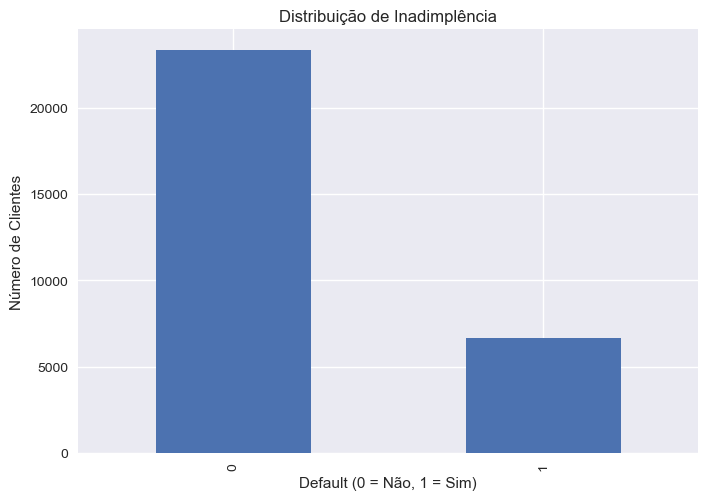

In [11]:
df['default payment next month'].value_counts().plot(kind='bar')

plt.title('Distribuição de Inadimplência')
plt.xlabel('Default (0 = Não, 1 = Sim)')
plt.ylabel('Número de Clientes')
plt.show()


### Insight 1 – Taxa de Inadimplência

A base de dados apresenta aproximadamente **22% de clientes inadimplentes**, indicando um risco relevante para a concessão de crédito.
Esse cenário reforça a importância de análises preditivas e segmentação de clientes para mitigar perdas financeiras.


In [12]:
df.groupby('default payment next month')['LIMIT_BAL'].mean()


default payment next month
0    178099.726074
1    130109.656420
Name: LIMIT_BAL, dtype: float64

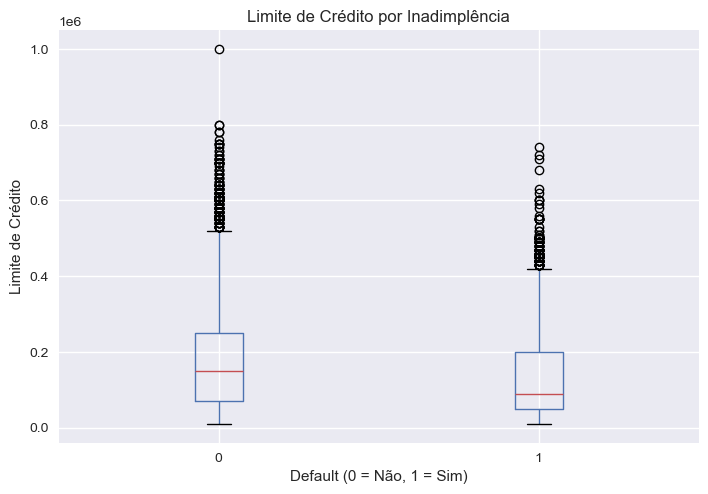

In [13]:
df.boxplot(column='LIMIT_BAL', by='default payment next month')
plt.title('Limite de Crédito por Inadimplência')
plt.suptitle('')
plt.xlabel('Default (0 = Não, 1 = Sim)')
plt.ylabel('Limite de Crédito')
plt.show()


### Insight 2 – Limite de Crédito e Risco

Clientes inadimplentes apresentam, em média, **limites de crédito inferiores** quando comparados aos clientes adimplentes.
Esse comportamento sugere que o limite de crédito é um fator relevante na análise de risco e pode ser utilizado na construção de um score de crédito.


In [14]:
df.groupby('default payment next month')['AGE'].describe()


,count,mean,std,min,25%,50%,75%,max
default payment next month,,,,,,,,
0,23364.0,35.417266,9.077355,21.0,28.0,34.0,41.0,79.0
1,6636.0,35.725738,9.693438,21.0,28.0,34.0,42.0,75.0


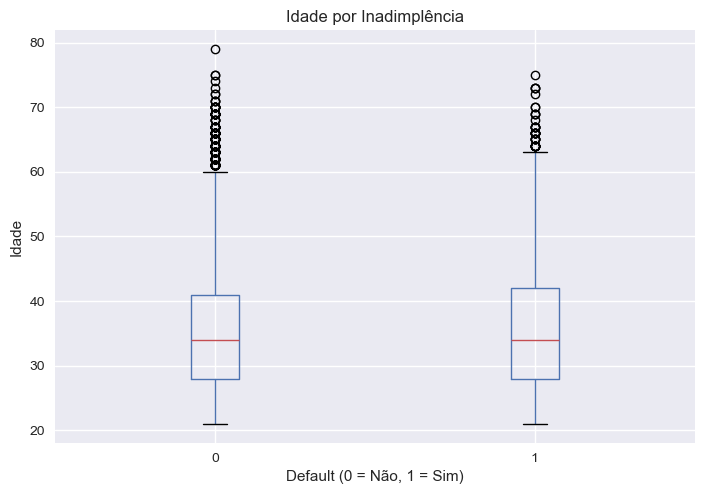

In [15]:
df.boxplot(column='AGE', by='default payment next month')
plt.title('Idade por Inadimplência')
plt.suptitle('')
plt.xlabel('Default (0 = Não, 1 = Sim)')
plt.ylabel('Idade')
plt.show()

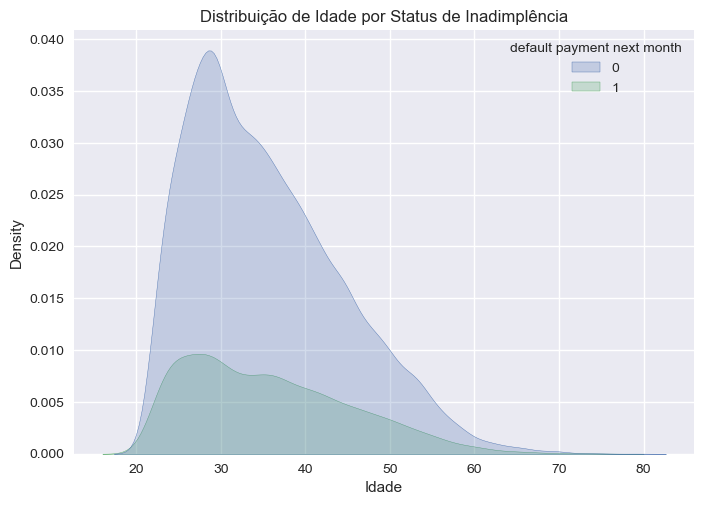

In [16]:
import seaborn as sns

sns.kdeplot(data=df, x='AGE', hue='default payment next month', fill=True)
plt.title('Distribuição de Idade por Status de Inadimplência')
plt.xlabel('Idade')
plt.show()


### Insight 3 – Idade e Inadimplência

Clientes inadimplentes tendem a apresentar idade média ligeiramente inferior em comparação aos clientes adimplentes.
Embora a idade isoladamente não determine o risco, ela contribui para o perfil comportamental e deve ser considerada em conjunto com outras variáveis.


In [17]:
pay_cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df[pay_cols + ['default payment next month']].head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month
0,2,2,-1,-1,-2,-2,1
1,-1,2,0,0,0,2,1
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,-1,0,-1,0,0,0,0


In [18]:
df.groupby('default payment next month')[pay_cols].mean()


,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
default payment next month,,,,,,
0,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,-0.405624
1,0.668174,0.458258,0.362116,0.254521,0.167872,0.112116


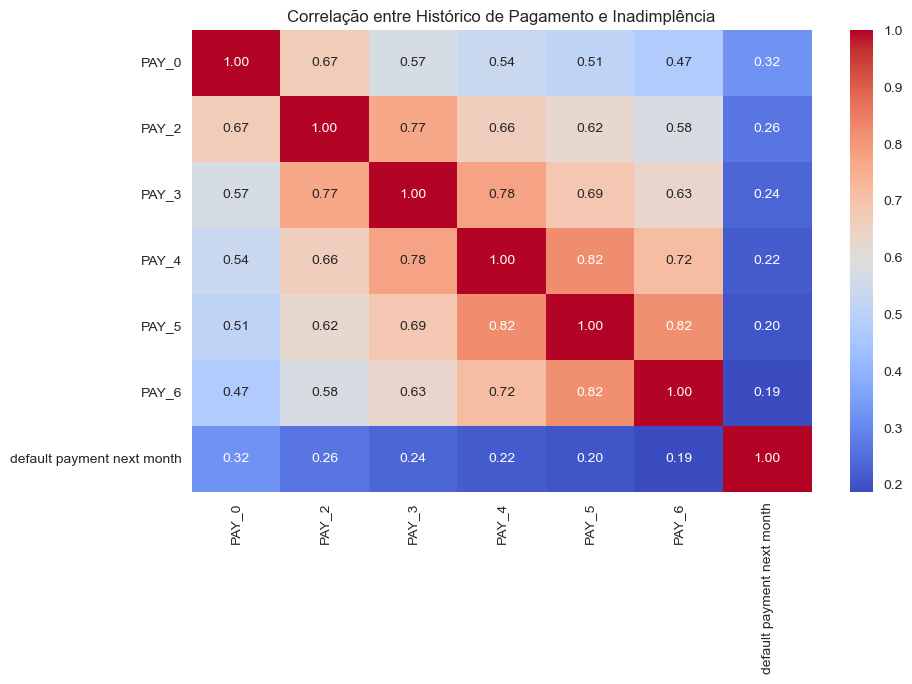

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df[pay_cols + ['default payment next month']].corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlação entre Histórico de Pagamento e Inadimplência')
plt.show()


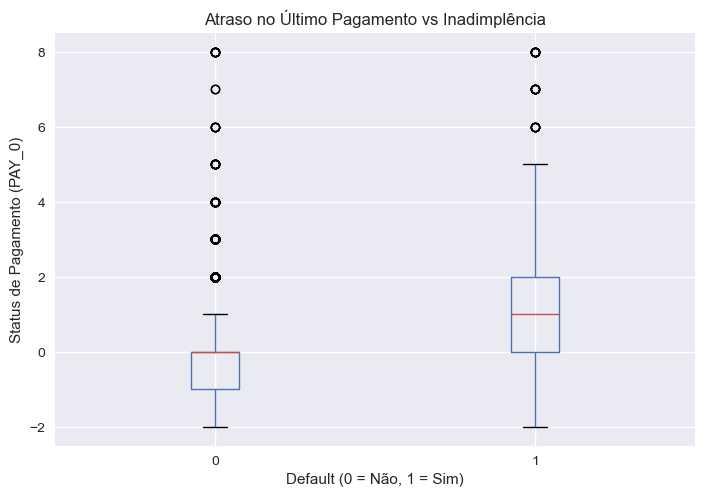

In [20]:
df.boxplot(column='PAY_0', by='default payment next month')
plt.title('Atraso no Último Pagamento vs Inadimplência')
plt.suptitle('')
plt.xlabel('Default (0 = Não, 1 = Sim)')
plt.ylabel('Status de Pagamento (PAY_0)')
plt.show()


### Insight 4 – Histórico de Pagamentos e Risco de Crédito

O histórico de atrasos é o fator mais determinante para a inadimplência.
Clientes inadimplentes apresentam médias significativamente maiores de atraso, principalmente no pagamento mais recente (PAY_0).
Esse comportamento reforça que padrões recentes de atraso são críticos para modelos de risco de crédito.
